
# <span style="color:rgb(213,80,0)">Bank data</span>

This file creates Figure 4.34-4.42.

## Data loading

In [1]:
clear
close all
load bank_data.mat
y=bank_data{:,end};
X=bank_data{:,1:end-1};
[n,p]=size(X);
prin=0;

## Create Figure 4.34

In [2]:
[outLXS]=LXS(y,X,'nsamp',20000);

Total estimated time to complete LMS:  3.65 seconds 
------------------------------

In [3]:
outFSeda=FSReda(y,X,outLXS.bs,'init',round(length(y)*0.25));

m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
m=1800
m=1900


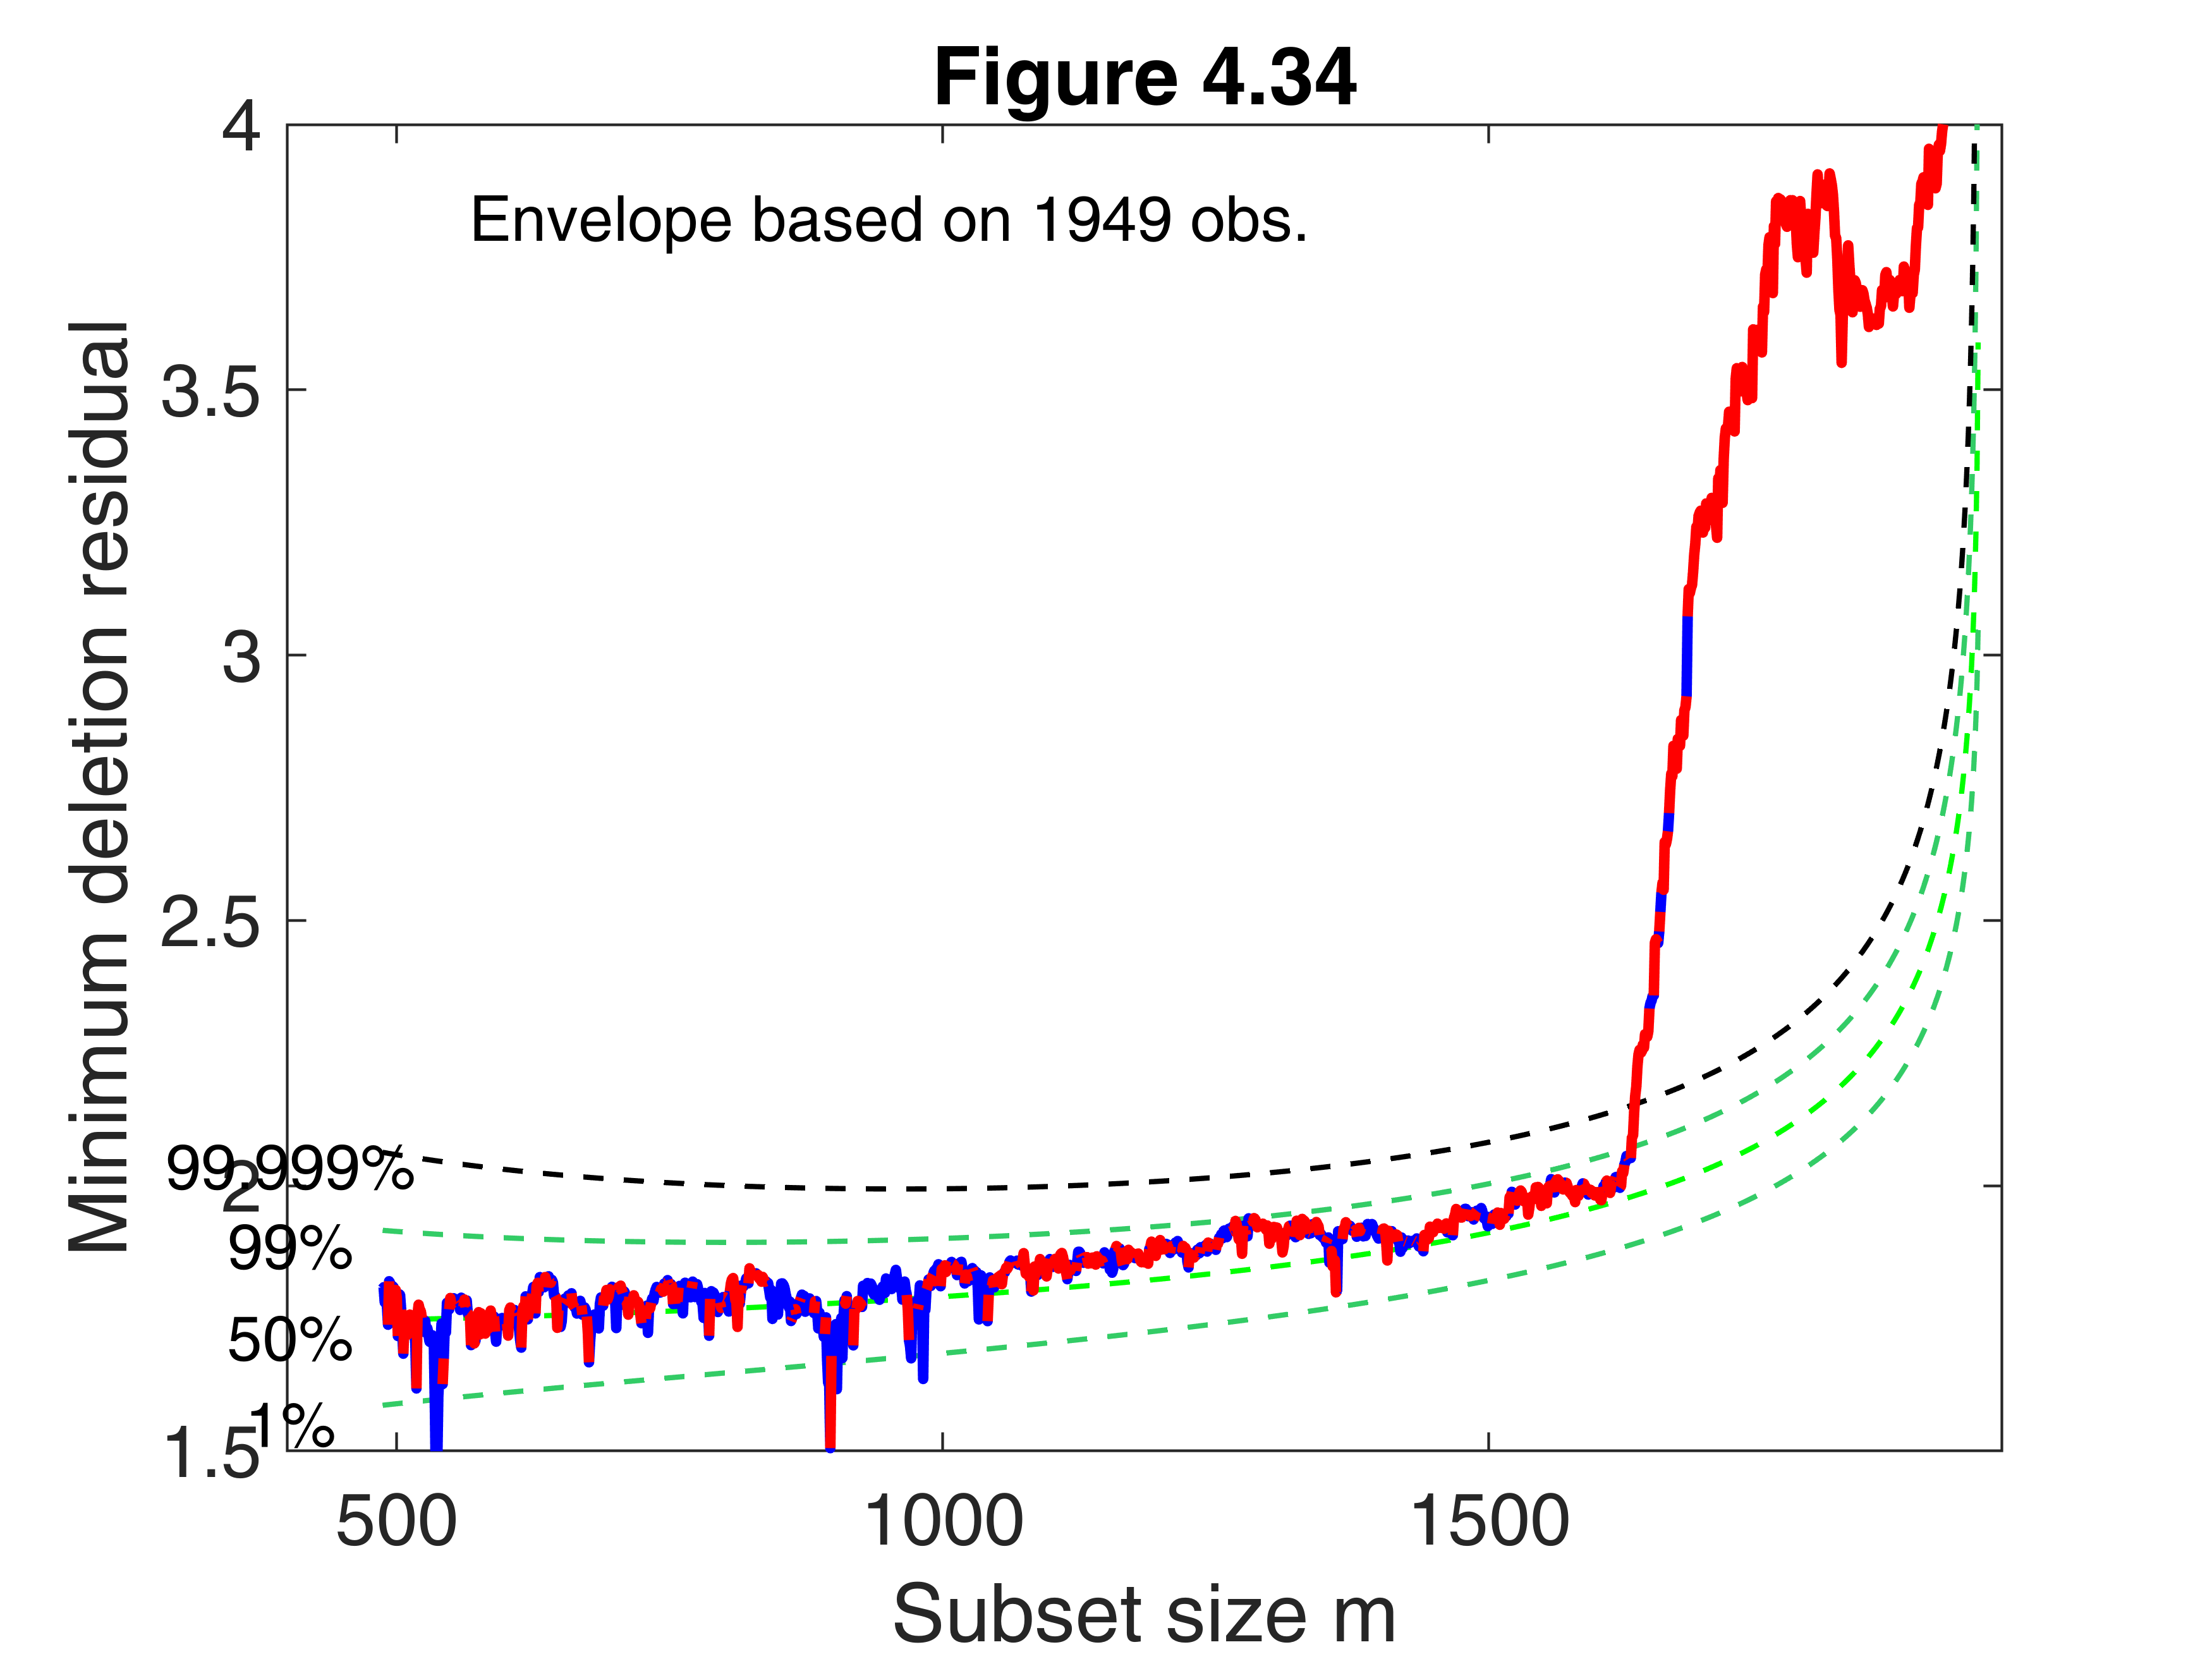

In [4]:
% Just plotting part
% end
% Plot minimum deletion residual
mdrplot(outFSeda,'ylimy',[1.5 4],'quant',[0.01 0.5 0.99 0.99999],'sign',1);
xlim([400 1970])
set(gca,'FontSize',14)

if prin==1
    % print to postscript
    print -depsc BDfsrmdr.eps;
end

title('Figure 4.34')
set(gcf,"Name",'Figure 4.34')

## Create Figure 4.35

Monitoring scaled residuals and highlight the 6 largest residuals



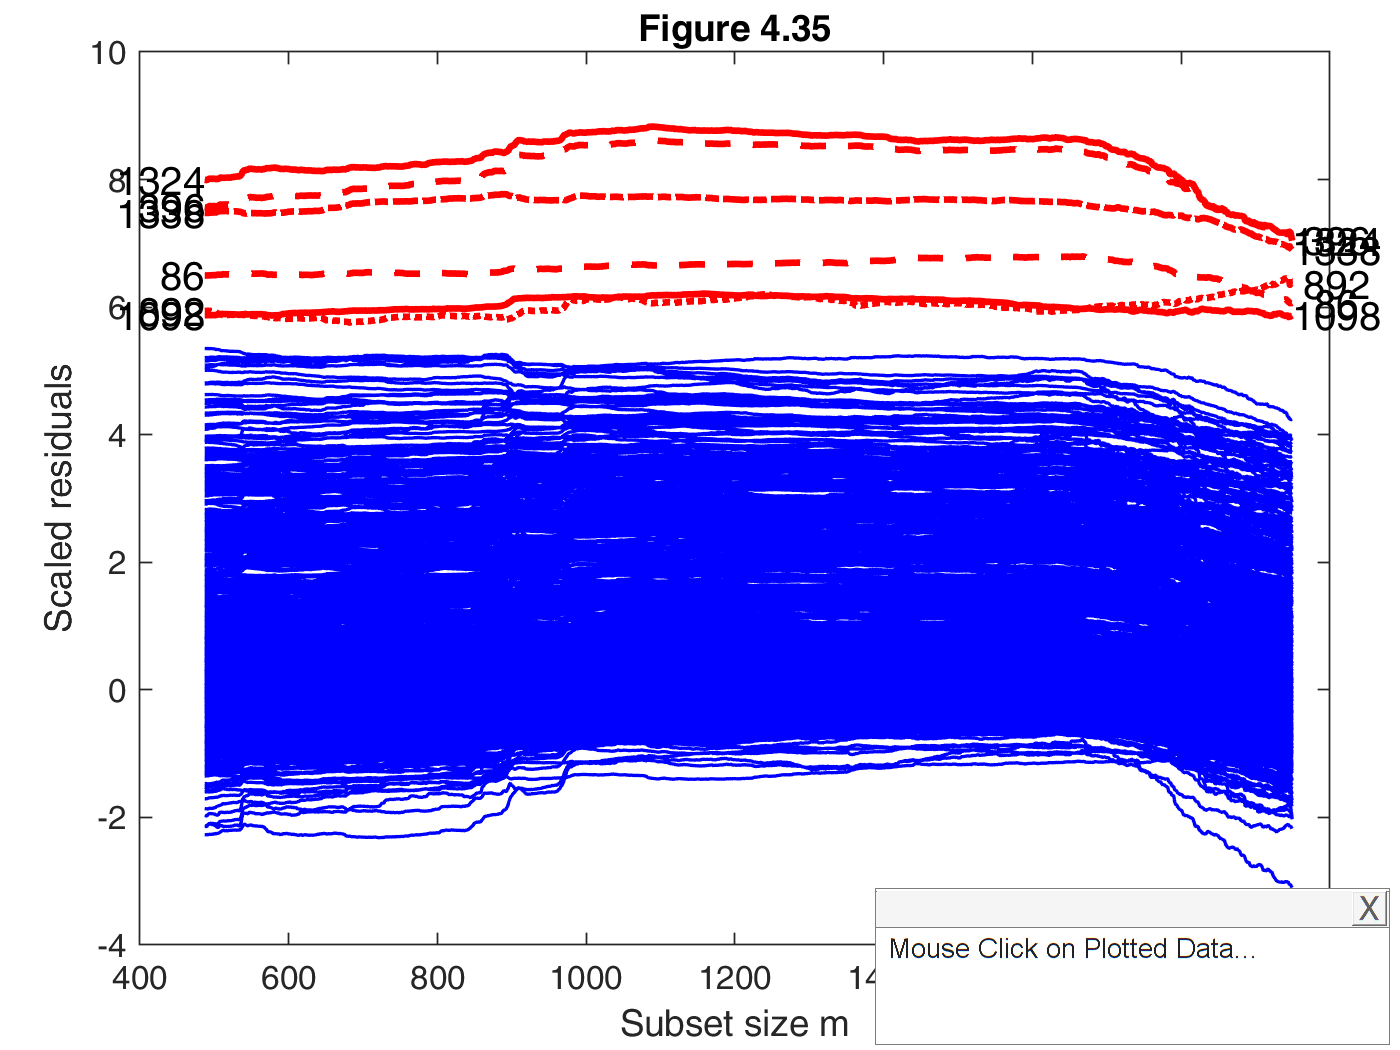

In [5]:
Un6Largest=outFSeda.Un(end-5:end,2);

fground=struct;
fground.funit=Un6Largest;
% Alternatively it was possible to define a thresh
% fground.fthresh=5.5;
fground.LineWidth =2;
fground.Color={'r'};
bground=struct;
bground.bthresh=-Inf;
resfwdplot(outFSeda,'fground',fground,'bground',bground)

title('Figure 4.35')
set(gcf,"Name",'Figure 4.35')

In [6]:
drawnow

## Create Figure 4.36


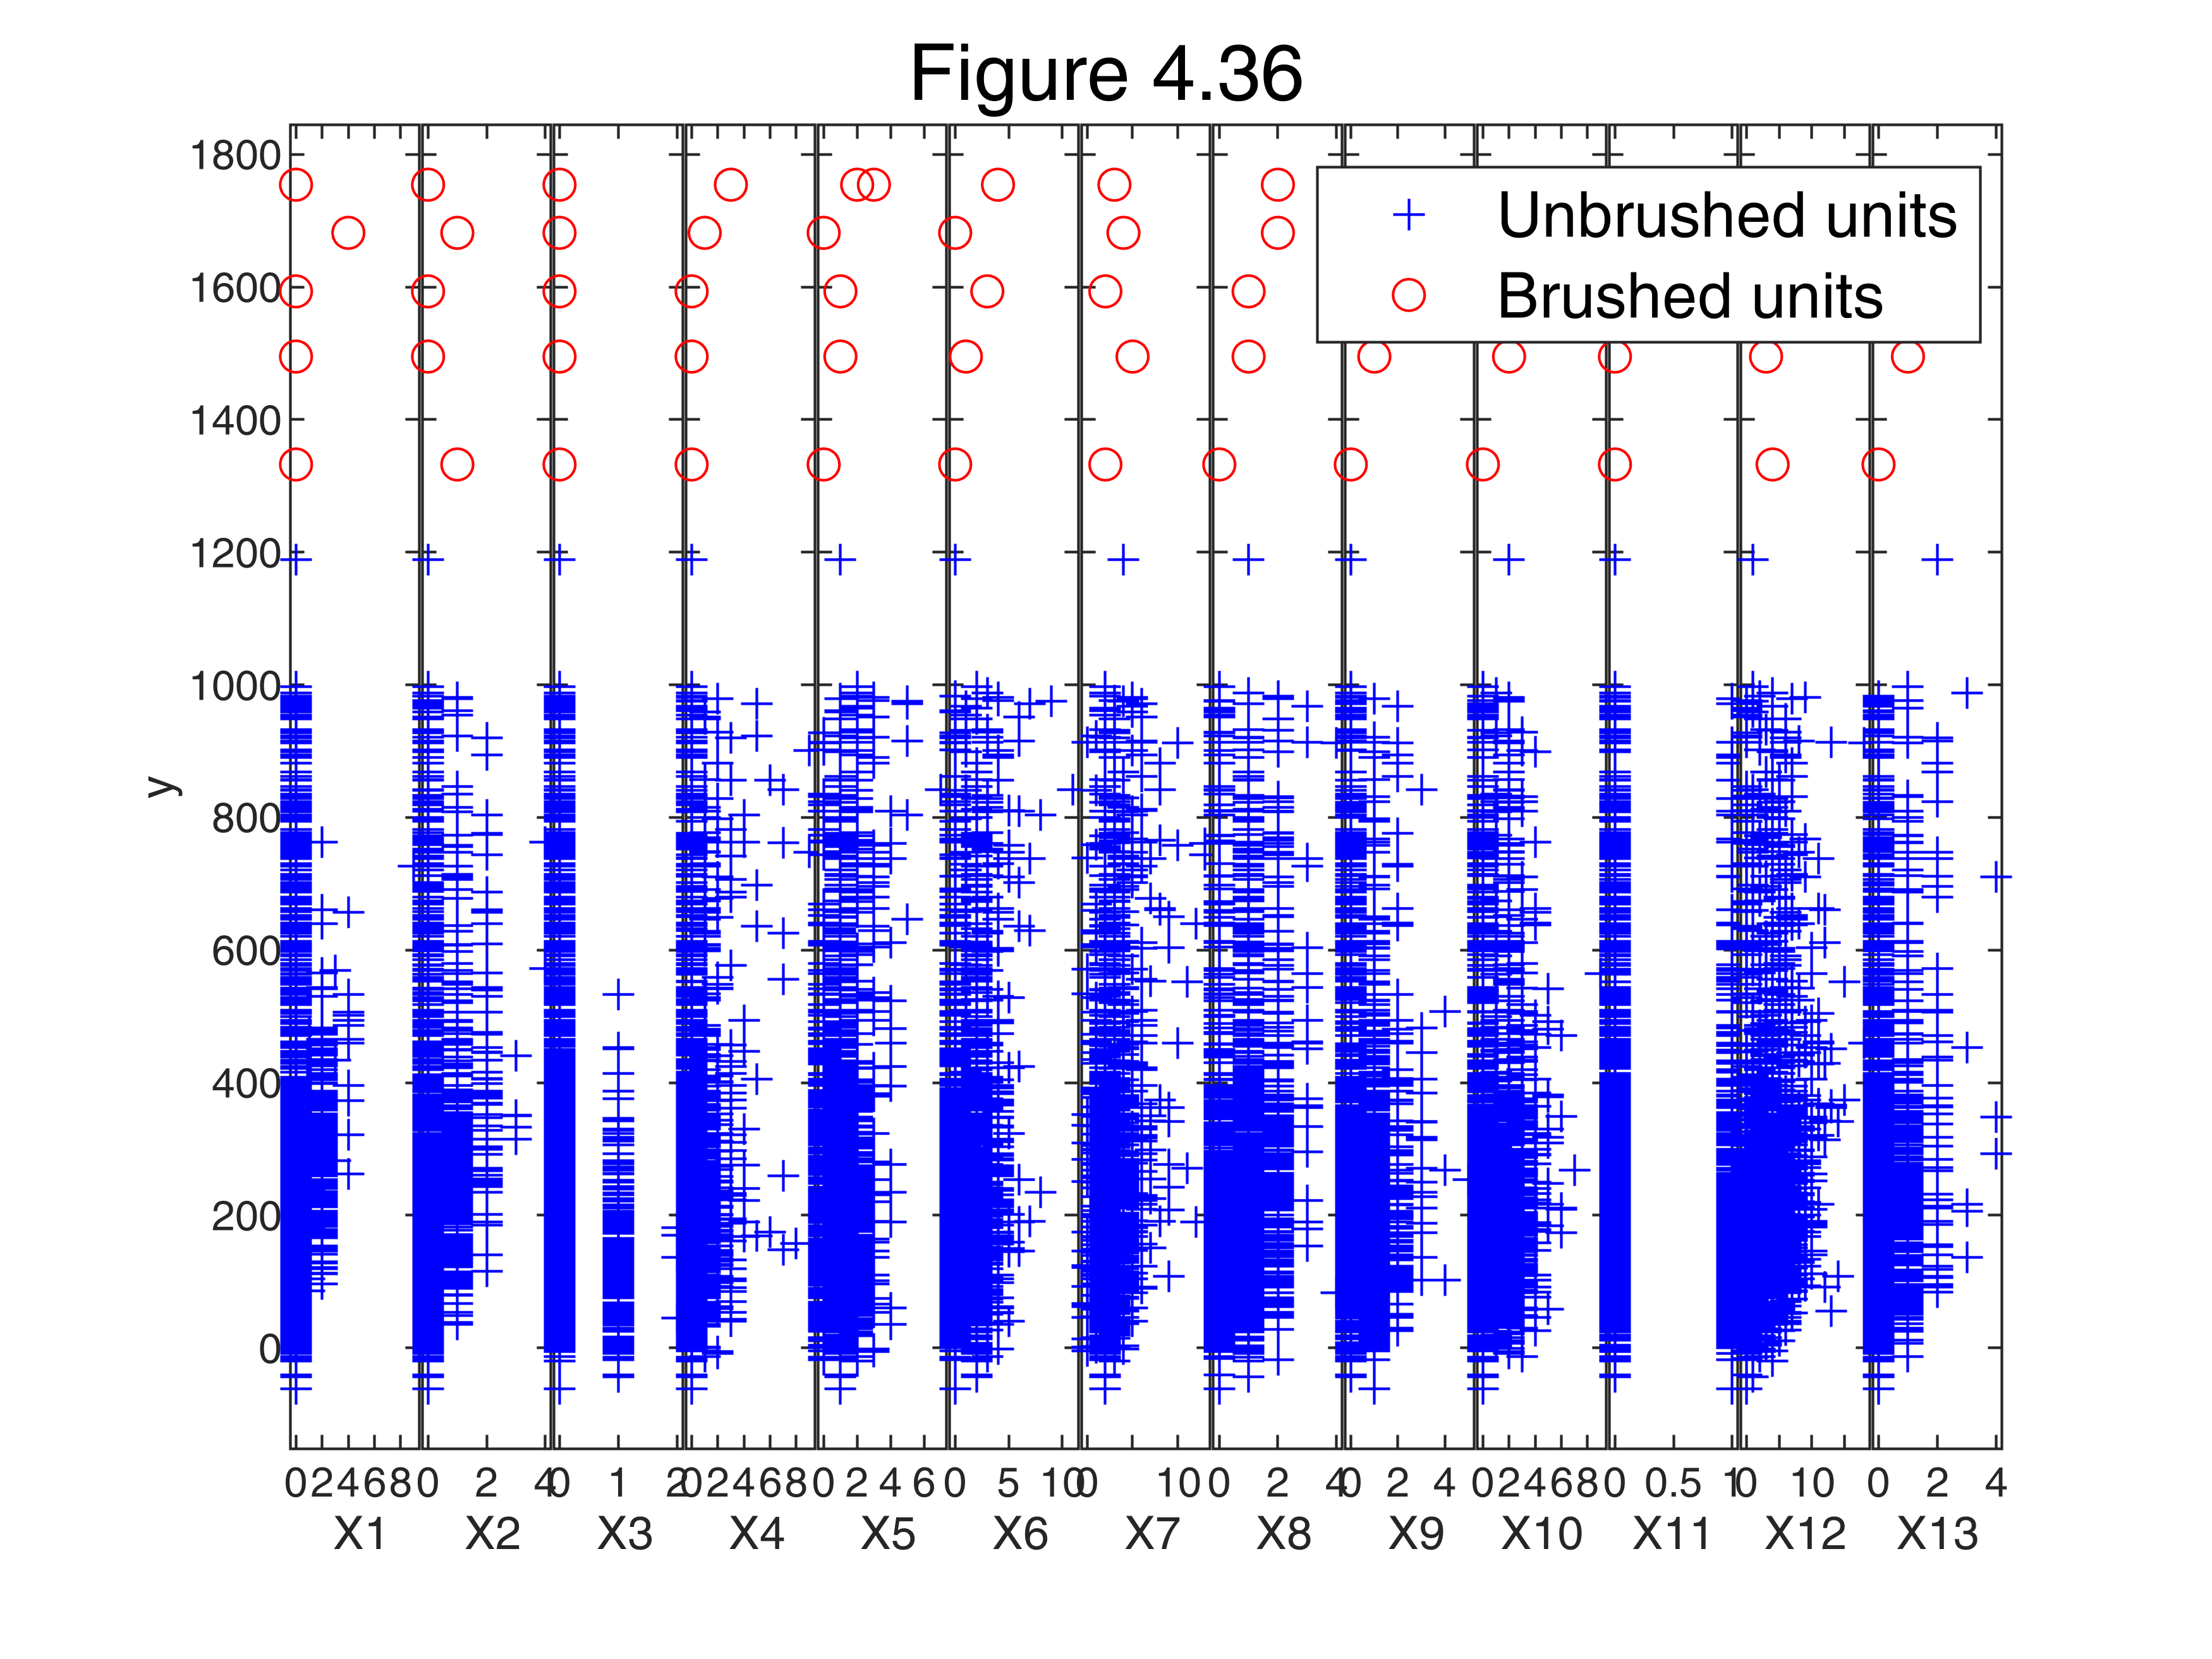

In [7]:
group=repelem("Unbrushed units",n,1);
group(Un6Largest)="Brushed units";
group=cellstr(group);
yXplot(y,X,'group',group);
if prin==1
    % print to postscript
    print -depsc BDyXbrush.eps
end

sgtitle('Figure 4.36')
set(gcf,"Name",'Figure 4.36')

In [8]:

% REMARK: in this file Figures 4.35 and 4.36 are not created interactively.
% In order to create them using brushing, please see file BankInteractive.m

## Prepare input for Figures 4.37 and 4.38

Analysis with S estimators (used differnt rhofunc)


In [9]:
disp('Monitoring S estimators')

Monitoring S estimators

In [10]:
% rhofunc='optimal';
rhofunc='bisquare';
outsTB=Sregeda(y,X,'rhofunc',rhofunc,'msg',false);

rhofunc='mdpd';
outsPD=Sregeda(y,X,'rhofunc',rhofunc,'msg',false);

sel=Un6Largest';
fground=struct;
fground.funit=sel;
fground.FontSize=1;

LineStyle=[ repmat({'-.'},6,1)];
Color= [ repmat({'r'},6,1); repmat({'k'},9,1); repmat({'b'},2,1)];
fground.Color=Color;  % different colors for different foreground trajectories
fground.LineWidth=3;
fground.LineStyle=LineStyle;

## Create Figure 4.37


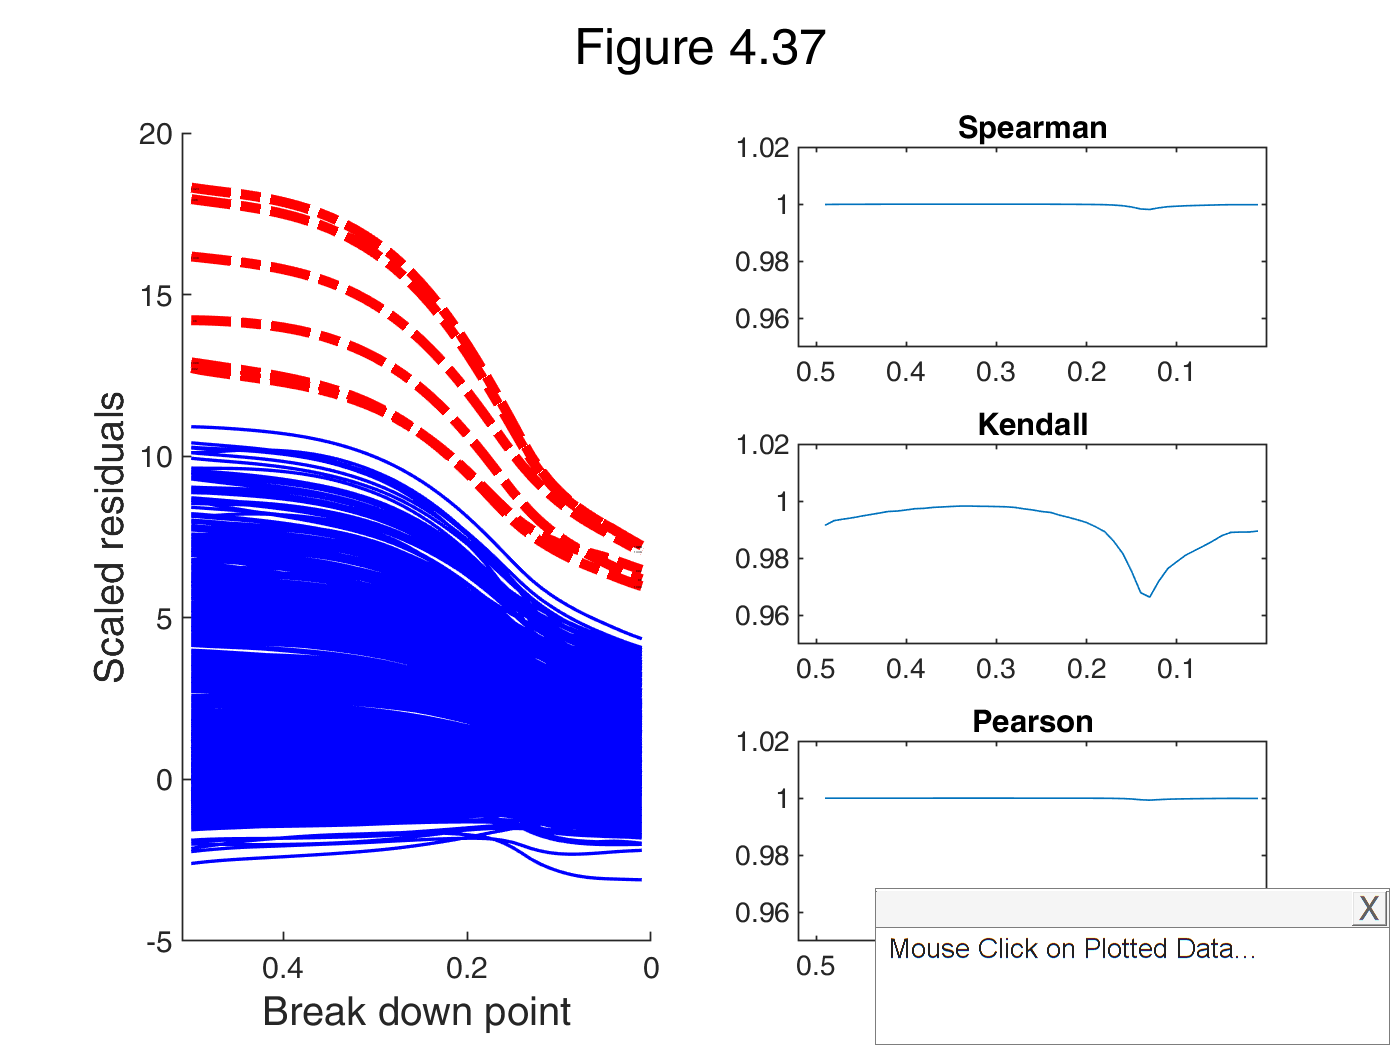

In [11]:
resfwdplot(outsTB,'fground',fground,'bground','','corres',true,'tag','plresTB');
sgtitle('Figure 4.37')
set(gcf,"Name",'Figure 4.37')

## Create Figure 4.38


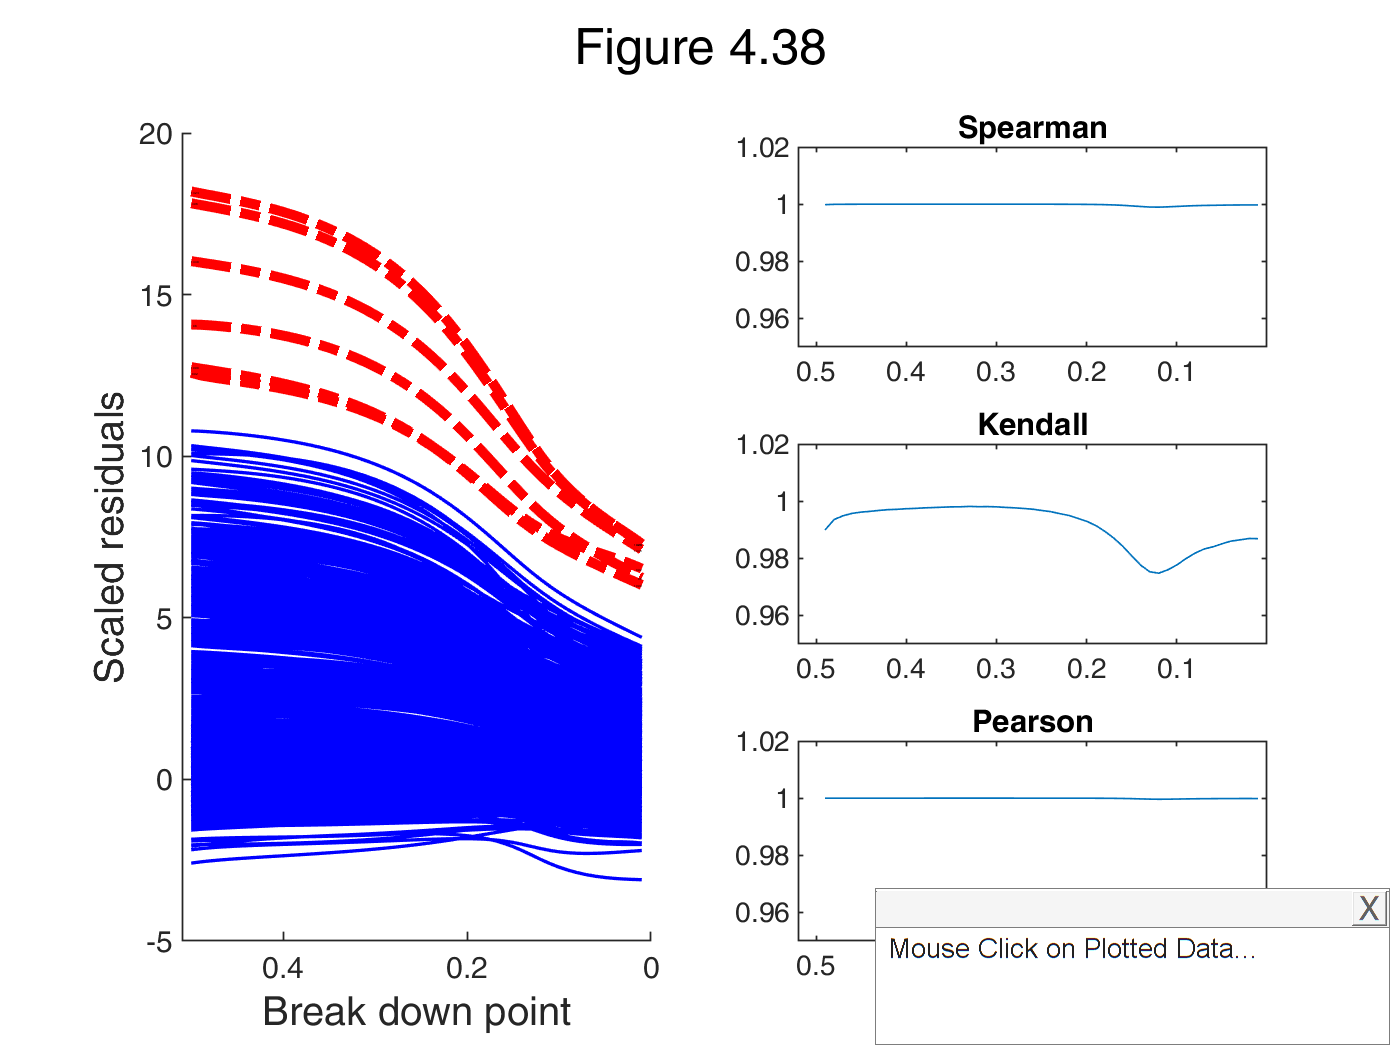

In [12]:
resfwdplot(outsPD,'fground',fground,'bground','','corres',true,'tag','plresPD');
sgtitle('Figure 4.38')
set(gcf,"Name",'Figure 4.38')

## Create Figure 4.39


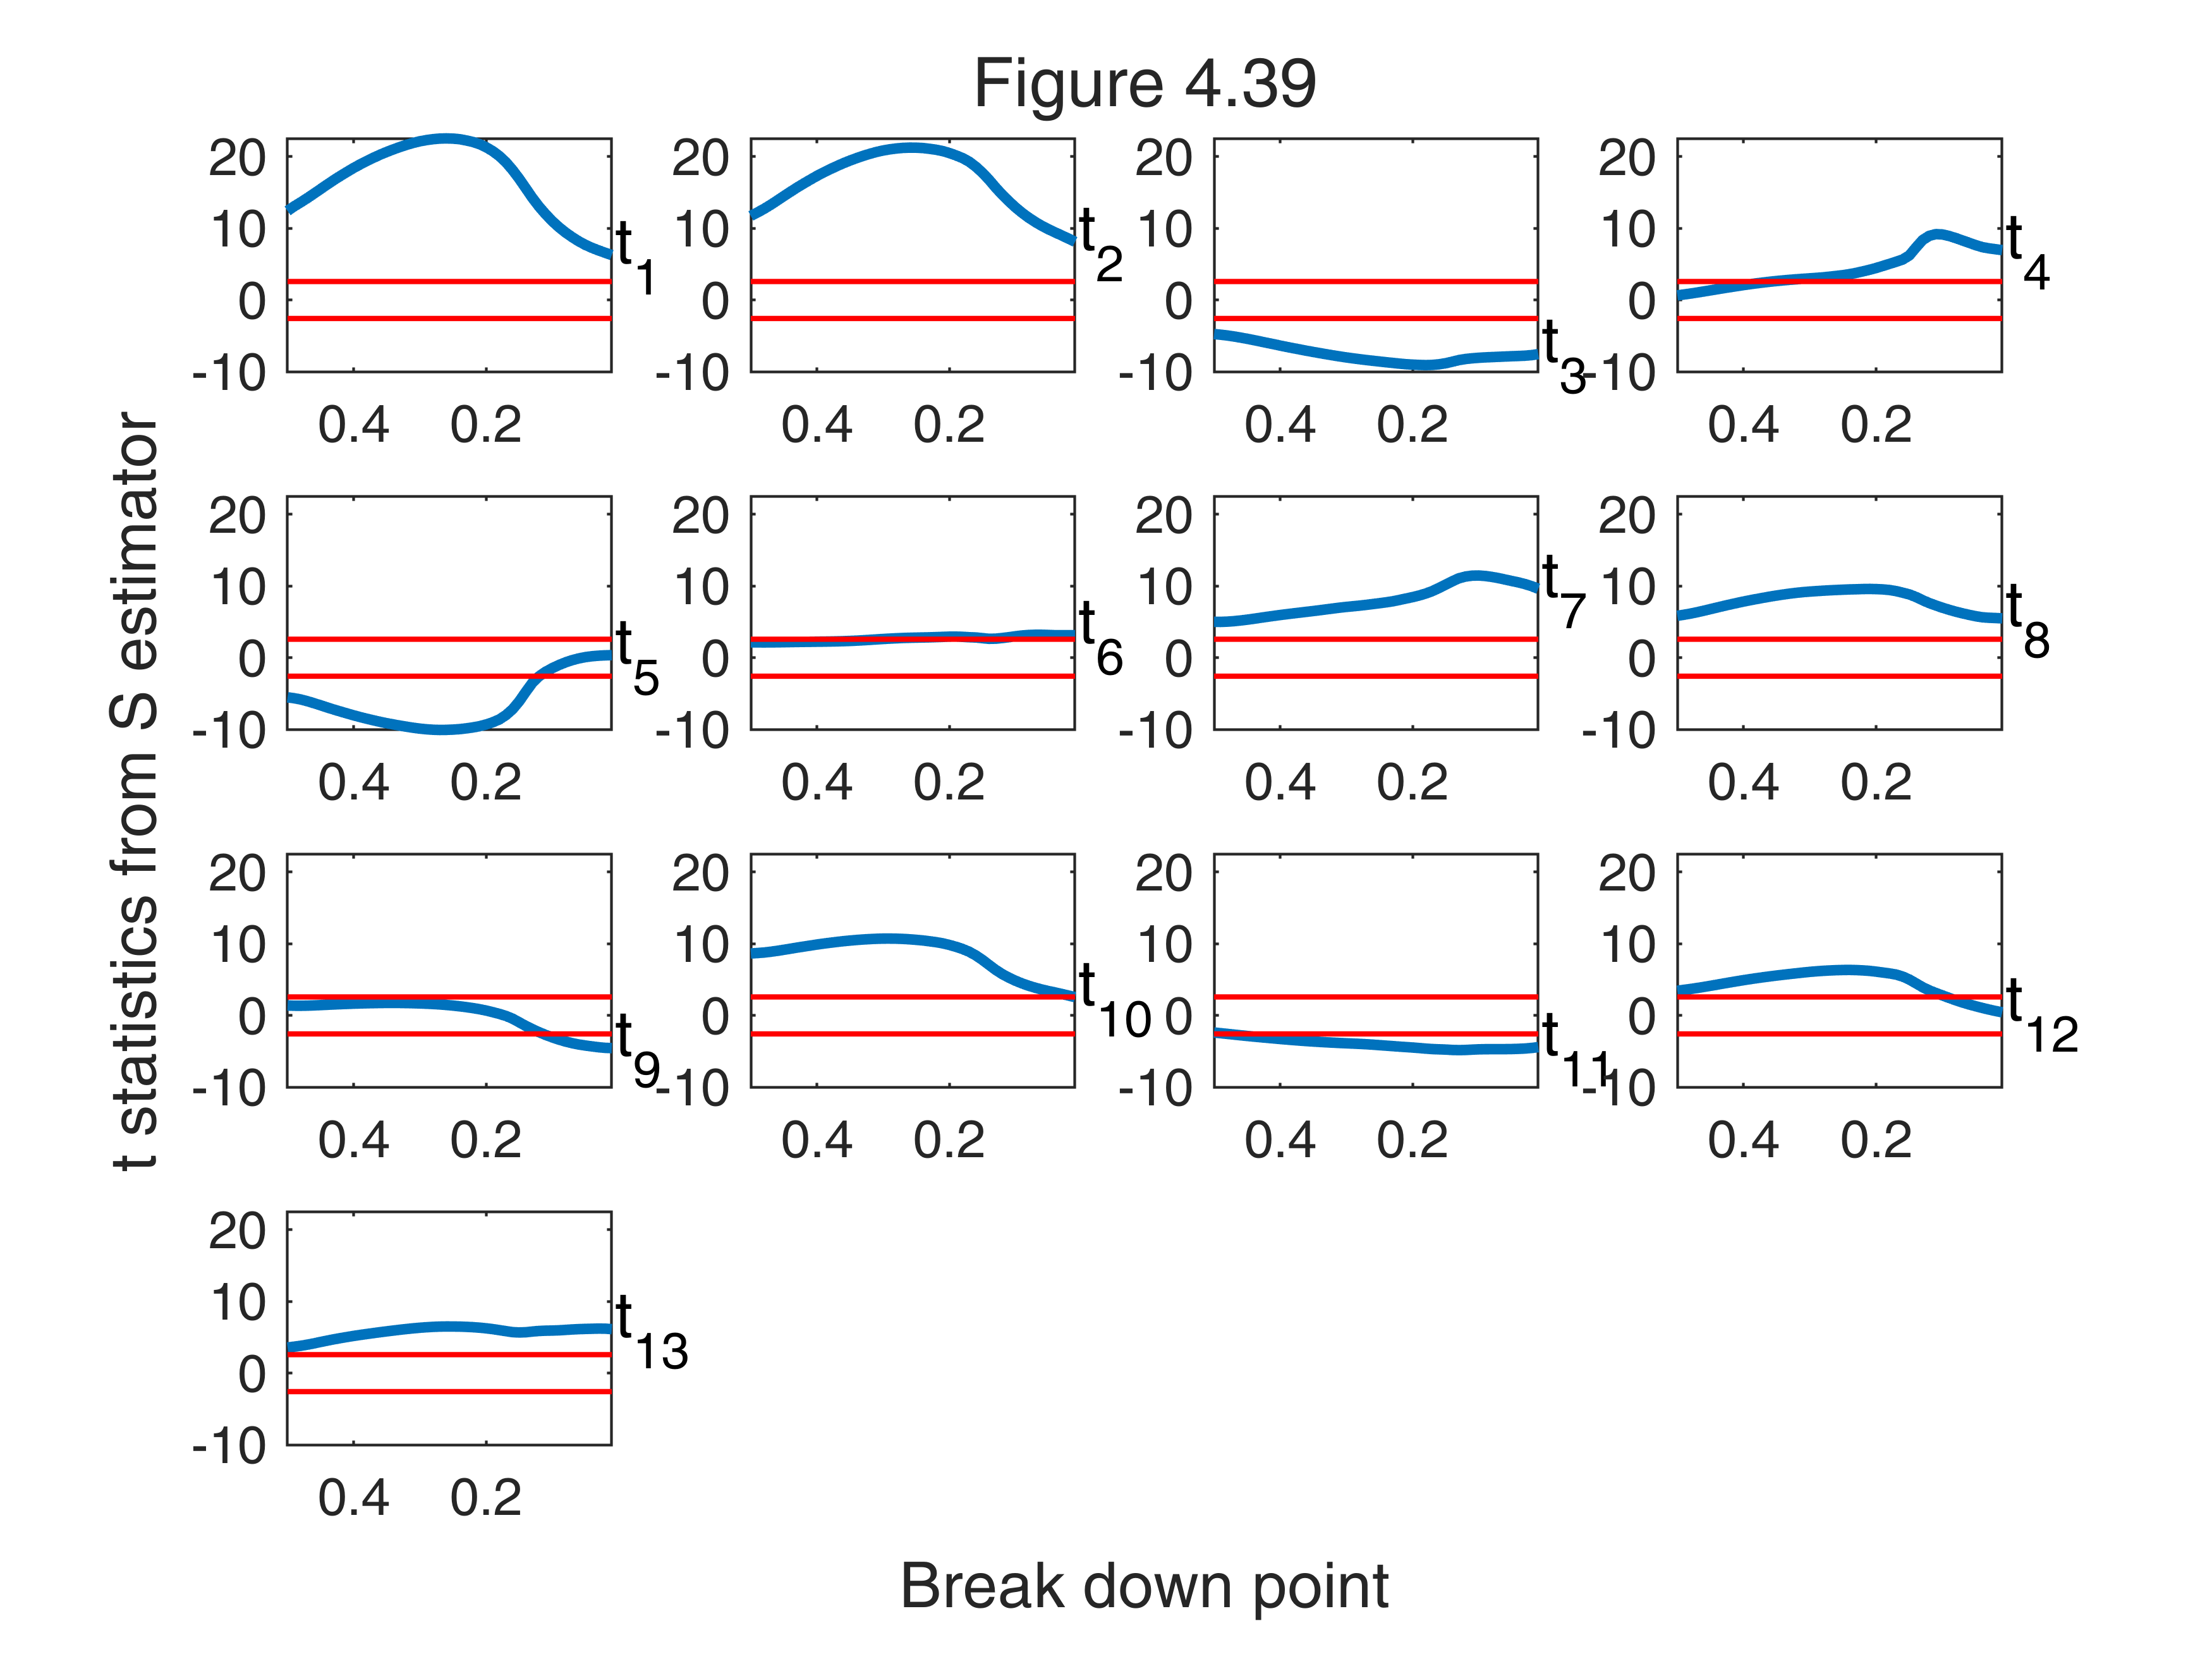

In [13]:
fanplotFS(outsTB,'multiPanel',true,'tag','pl_tstat');

sgtitle('Figure 4.39')
set(gcf,"Name",'Figure 4.39')

In [14]:

if prin==1
    % print to postscript
    print -depsc figs\StstatBD.eps;
end

## Create Figure 4.40


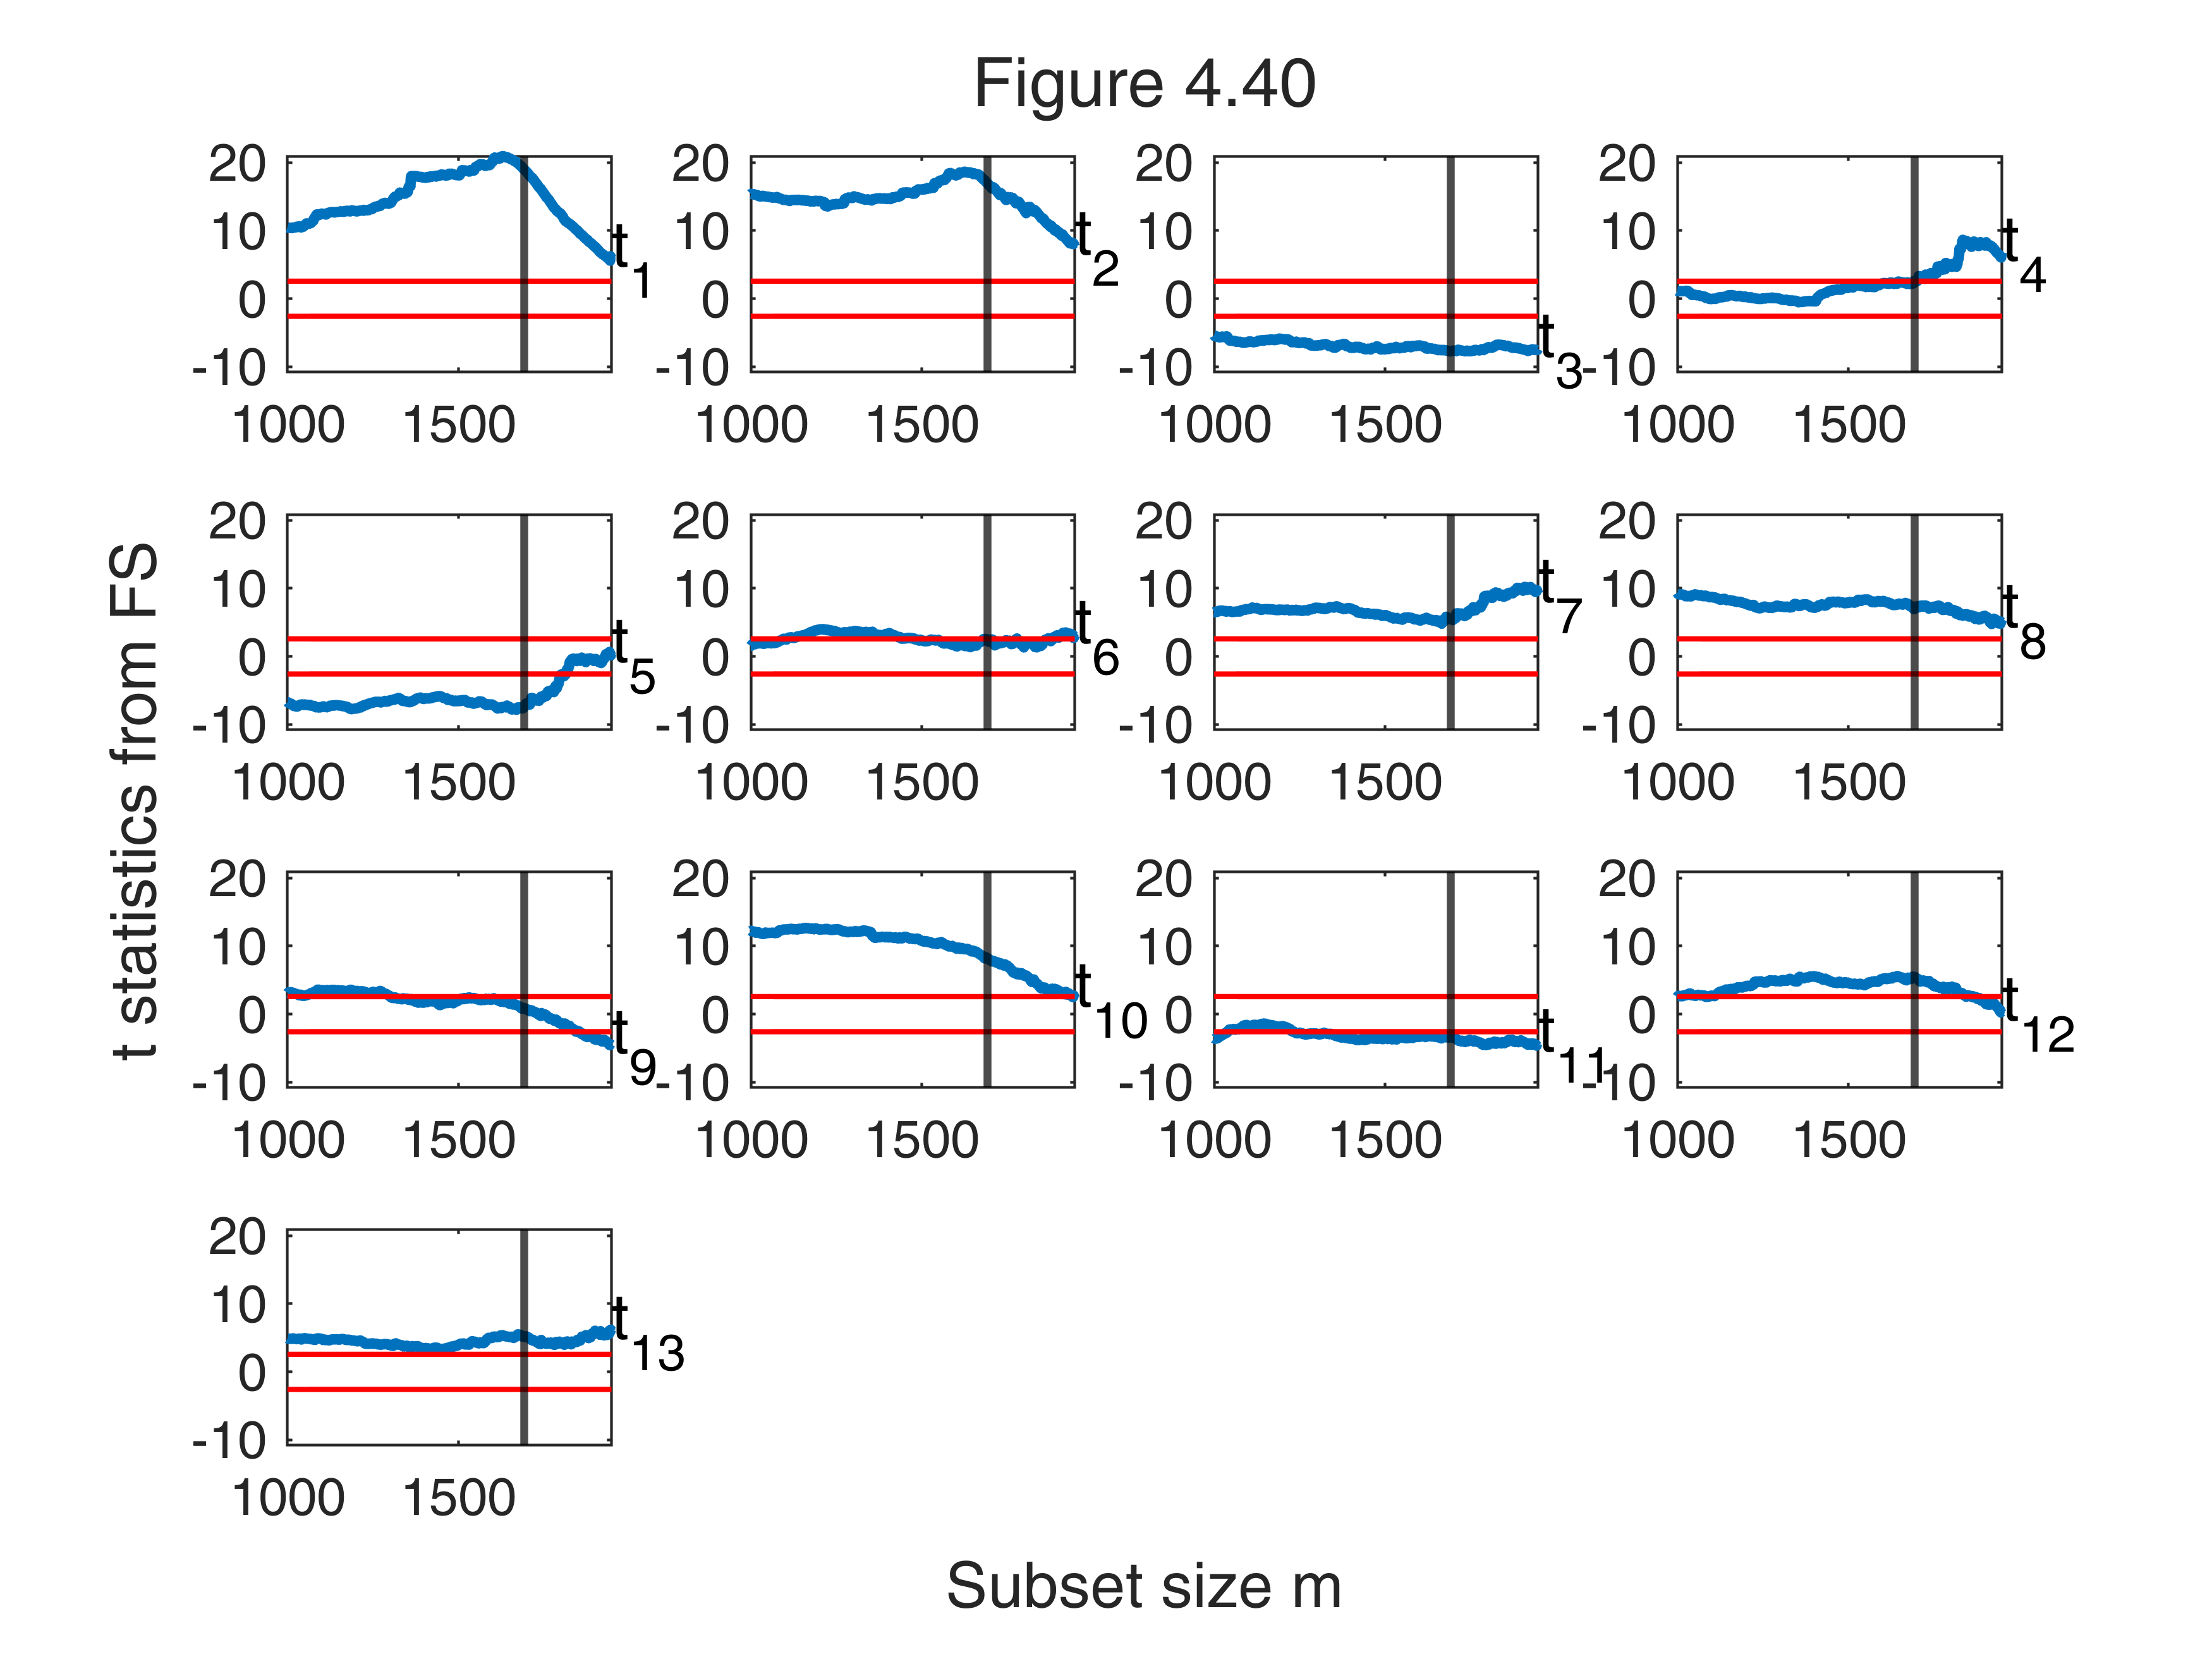

In [15]:
fanplotFS(outFSeda,'multiPanel',true,'addxline',1694,'xlimx',[1000 n+1]);
sgtitle('Figure 4.40')
set(gcf,"Name",'Figure 4.40')

## Create Figure 4.41

Monitoring of added tstat


In [16]:
disp('Monitoring added t stat')

Monitoring added t stat


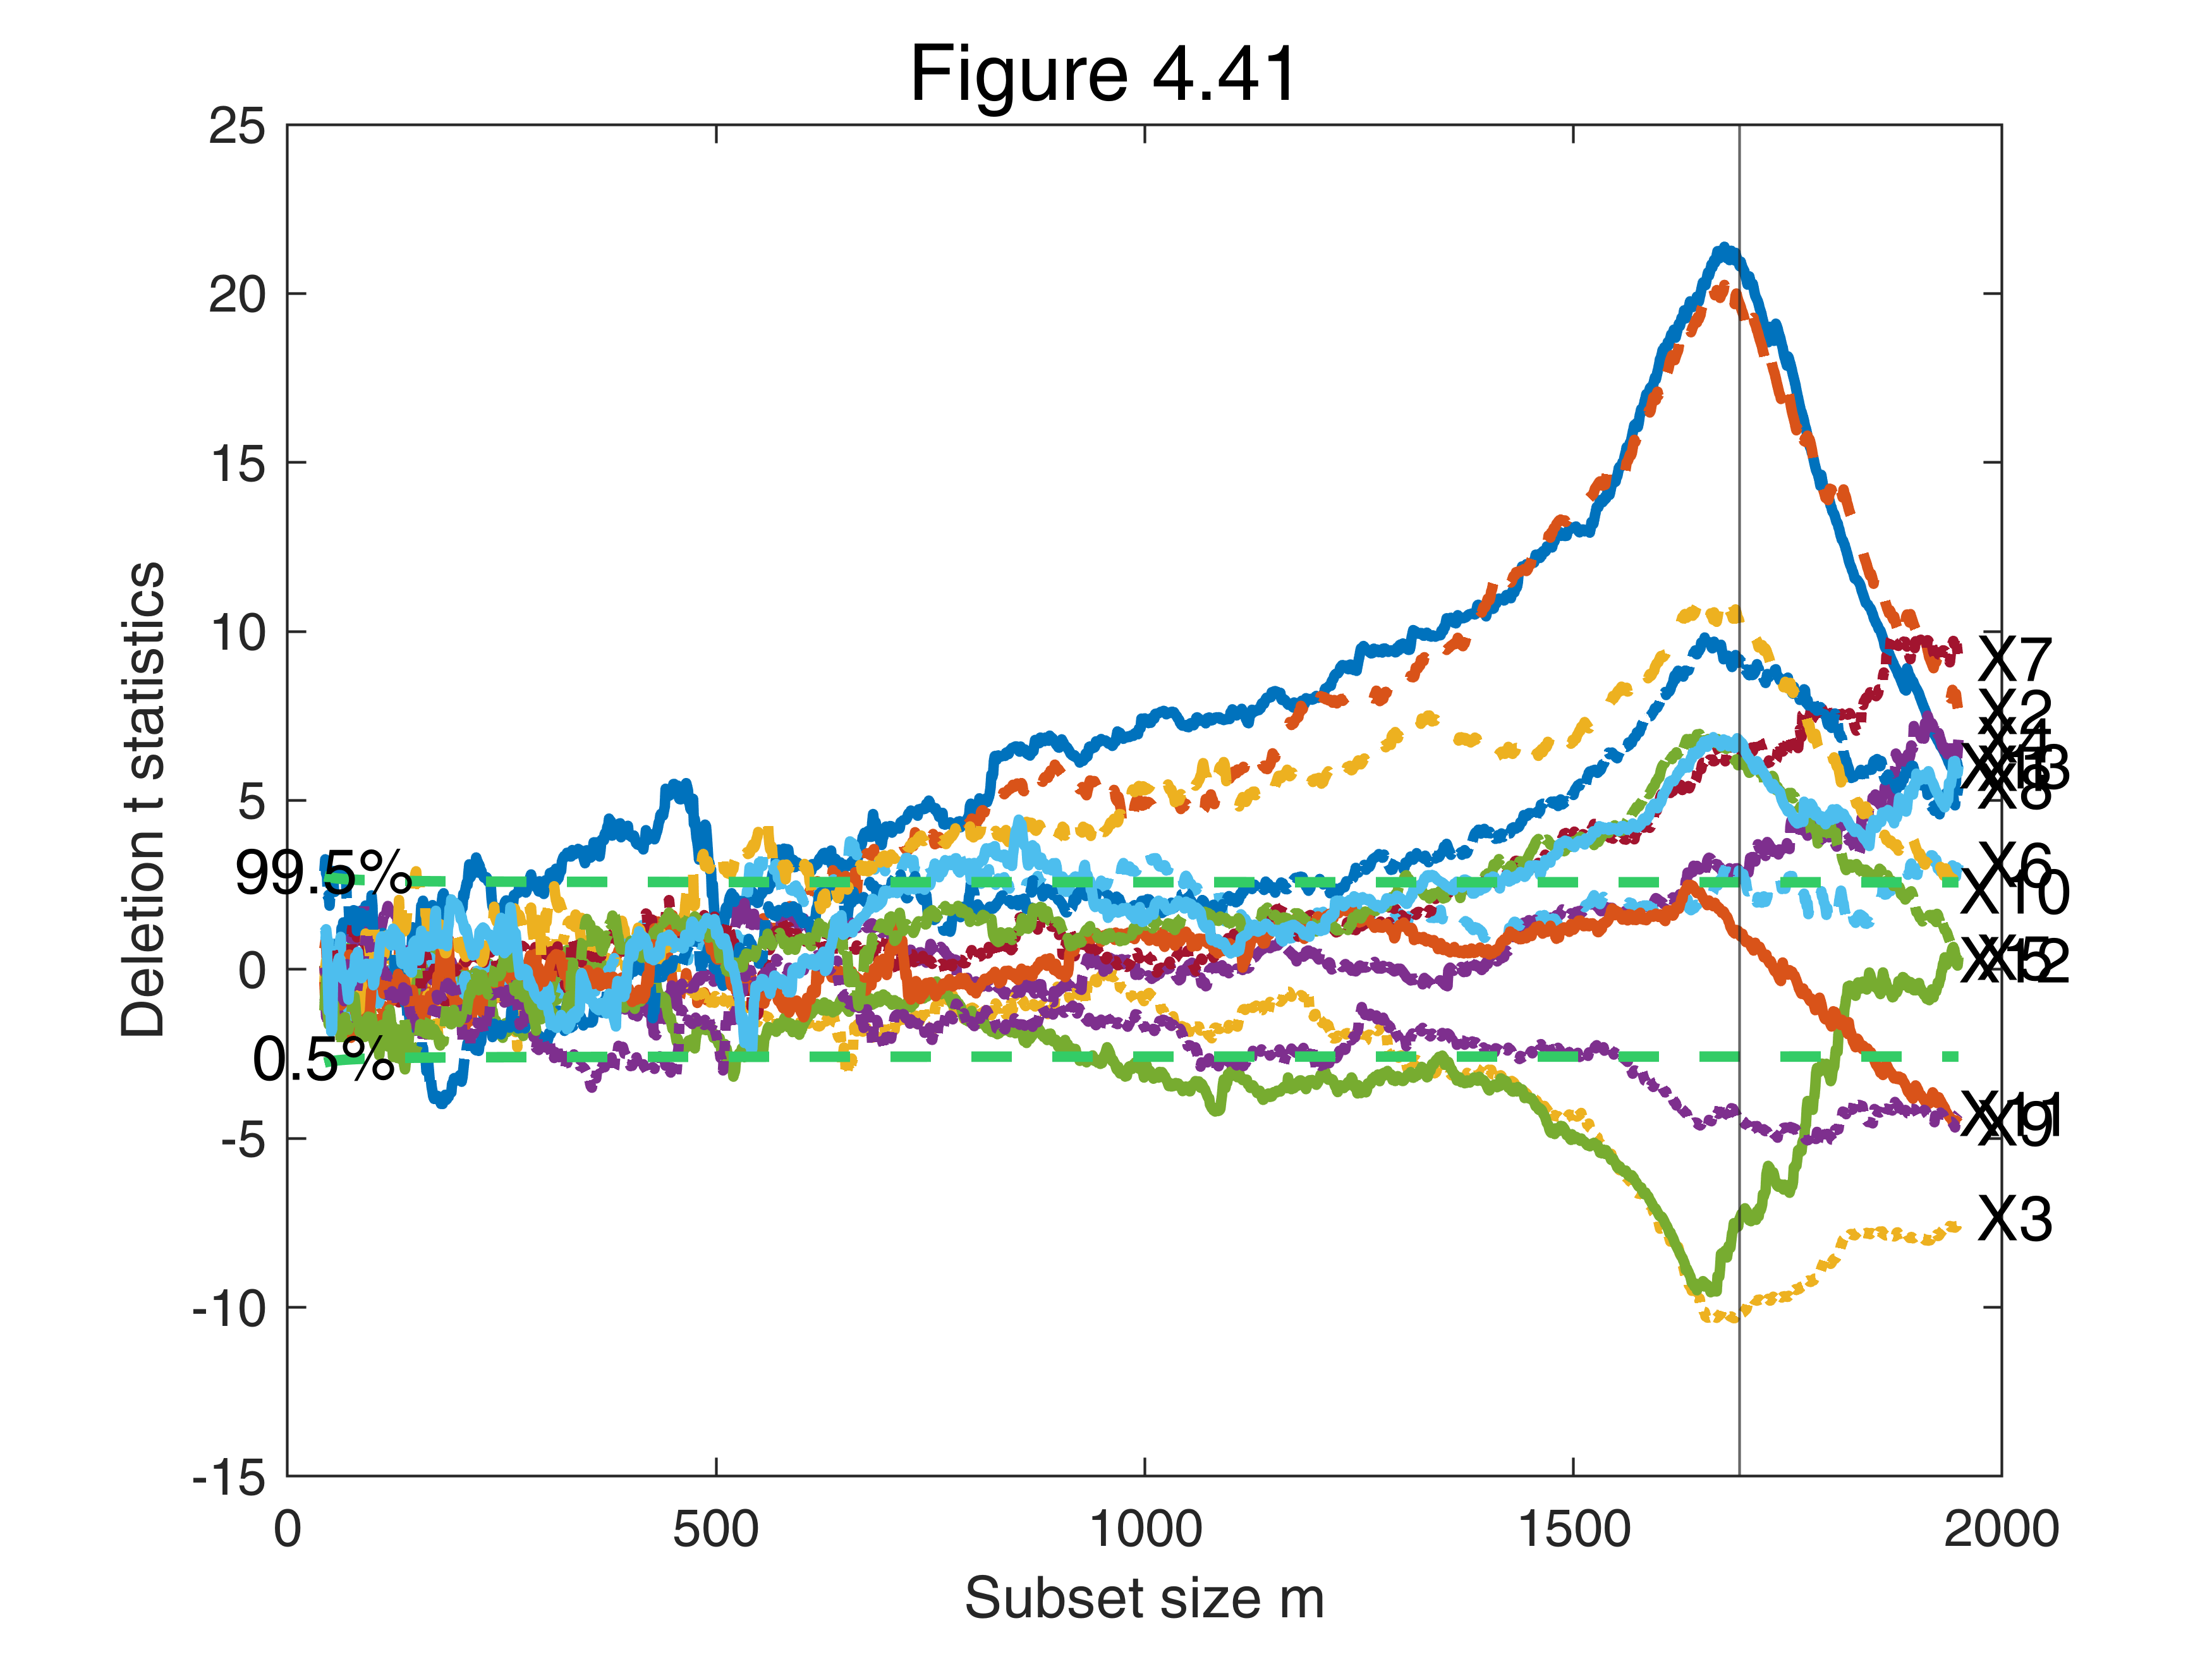

In [17]:
figure
outADDt=FSRaddt(y,X,'plots',1,'msg',0);
sgtitle('Figure 4.41')
set(gcf,"Name",'Figure 4.41')
xline(1694)

## Prepare input for Figure 4.42

In [18]:
disp('Automatic outlier detection')

Automatic outlier detection

In [19]:
[outFSauto]=FSR(y,X,'plots',0);

------------------------------
Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=1634 because
rmin(1634,1949)>99.99% and rmin(1633,1949)>99.99% and rmin(1635,1949)>99.99%
rmin(1634,1949)>99.999%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=1633
Superimposition stopped because r_{min}(1669,1695)>99.9% envelope
Subsample of 1694 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=255
Summary of the exceedances
           1          99         999        9999       99999
          13         331         316         316         315

In [20]:
seq=1:n;
outliers=outFSauto.outliers;
good=setdiff(seq,outliers);
maxy=max(y);
plo=struct;
plo.ylimy=[0 maxy];
nameX="X"+string(1:p);
plo.nameX=nameX;
plo.namey='y';

## Create left-hand panel of Figure 4.42


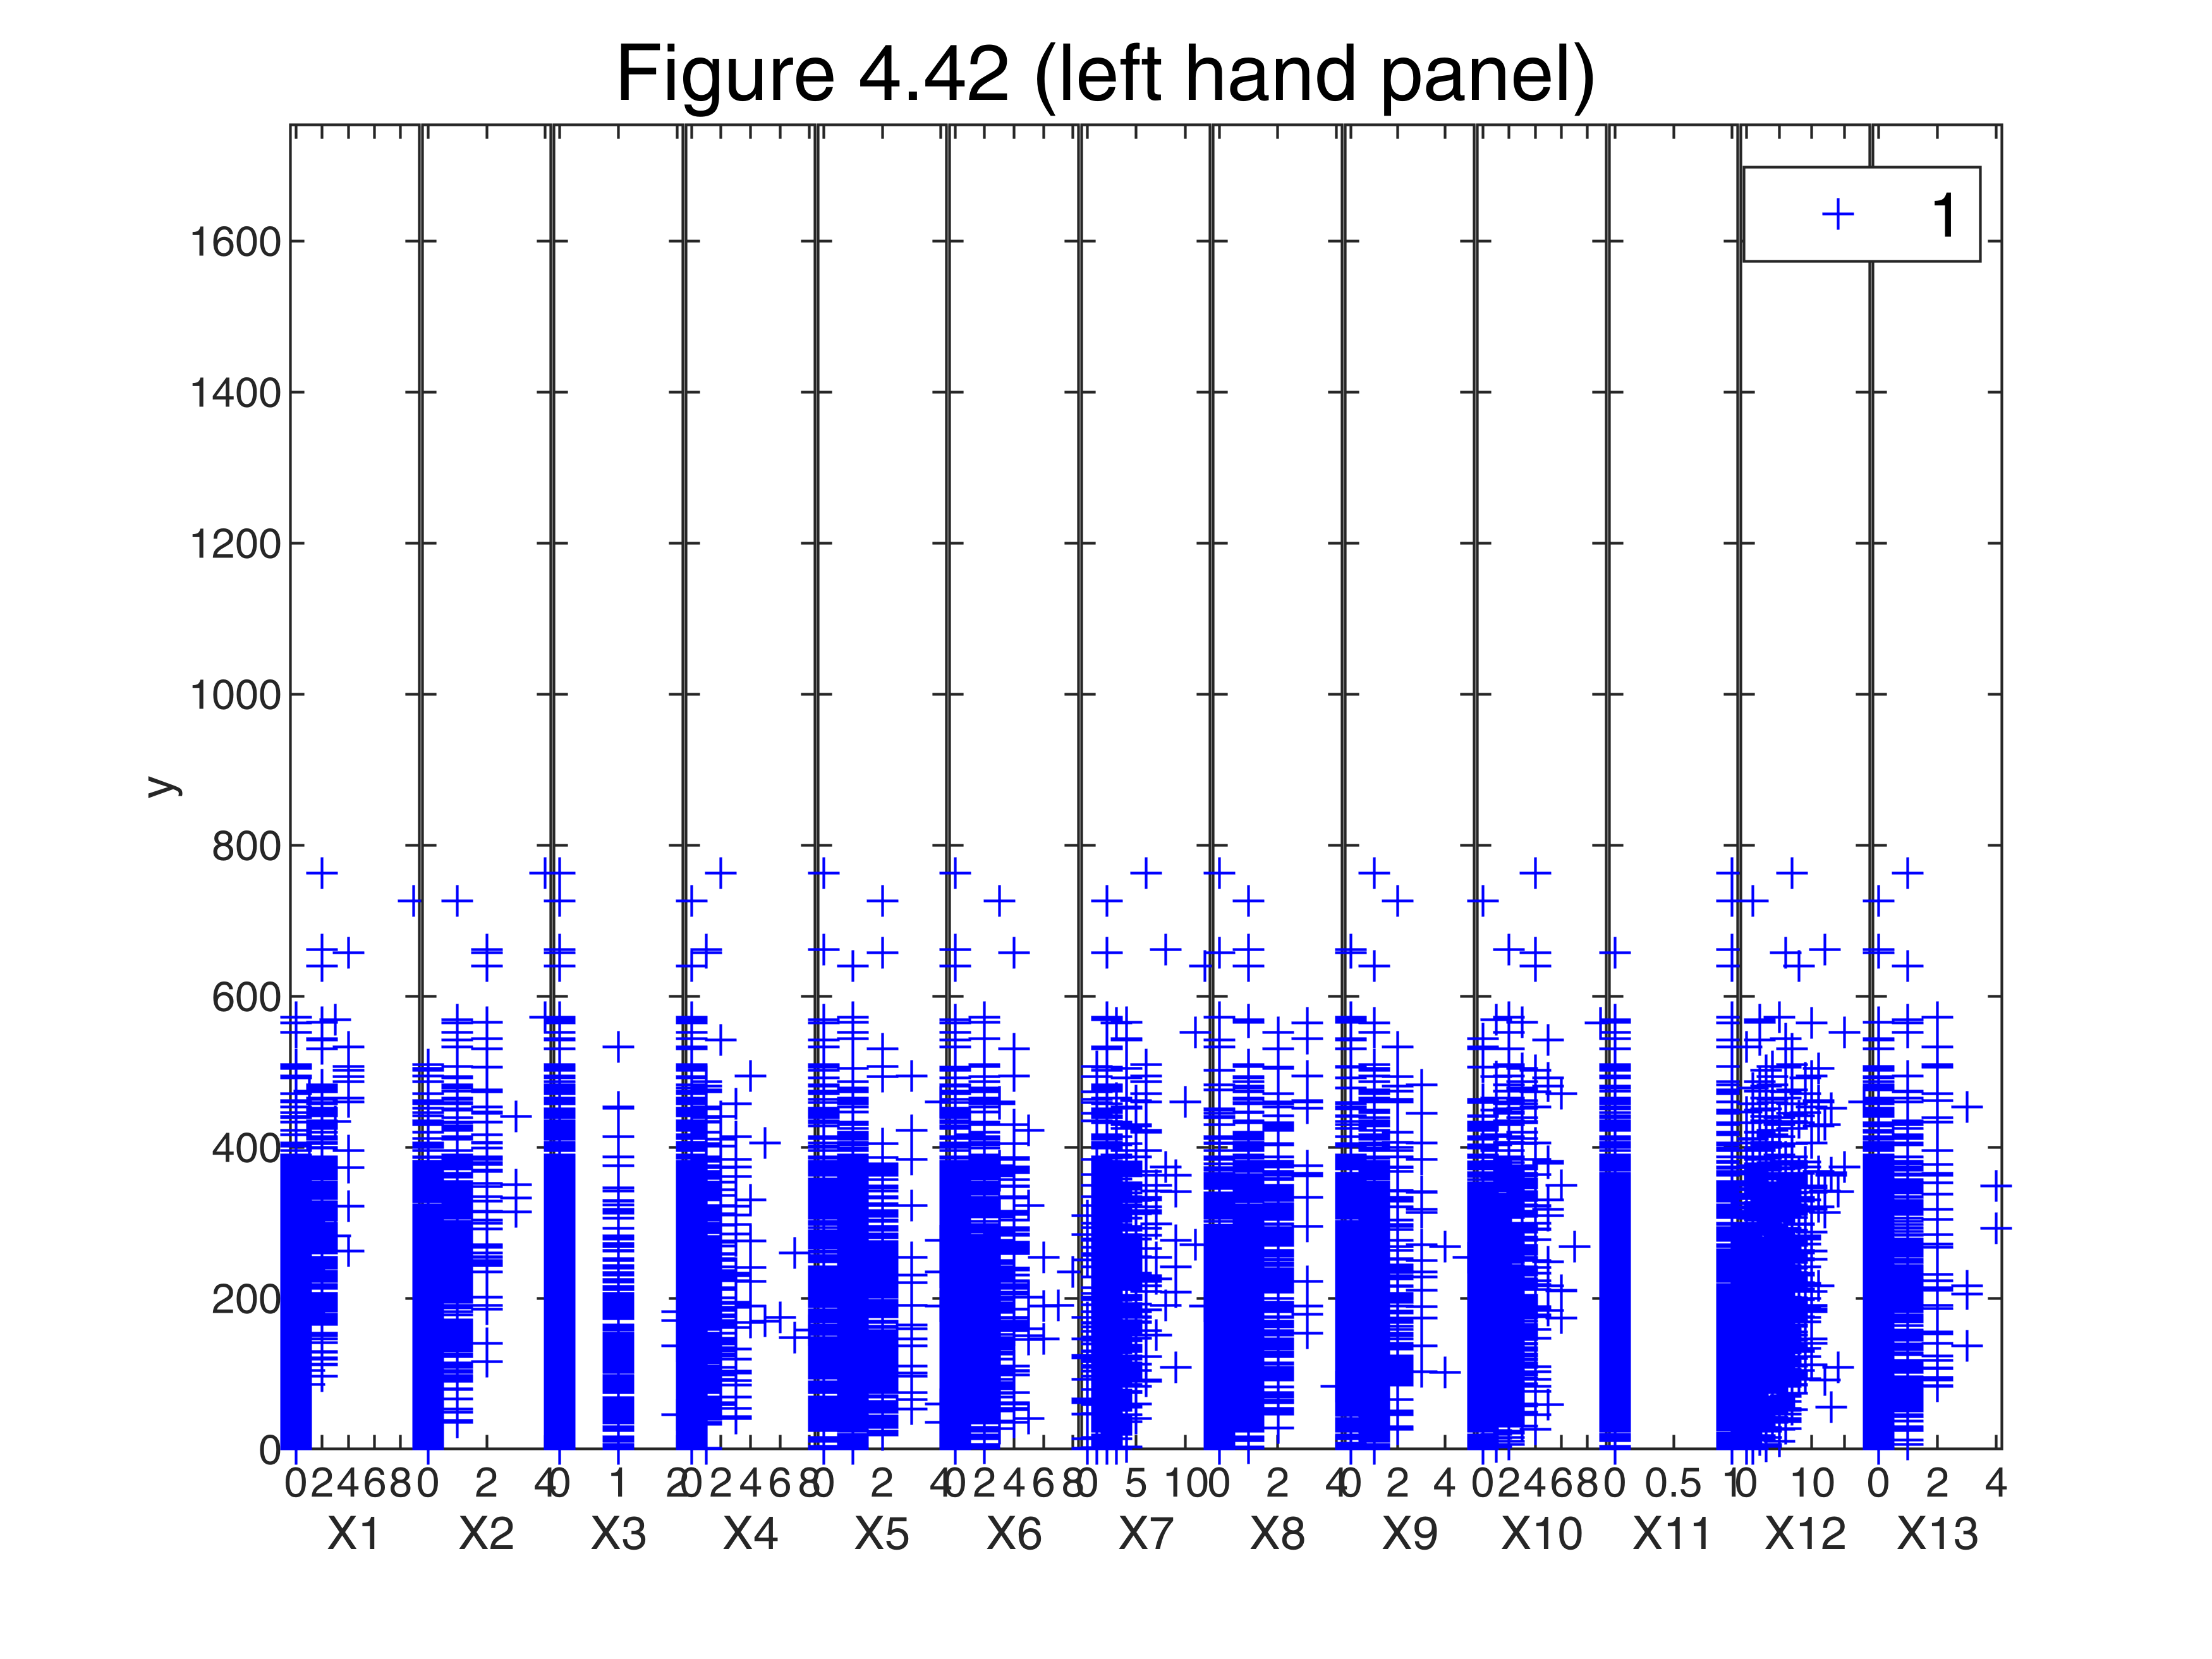

In [21]:
plo.sym='+';
plo.clr='b';
yXplot(y(good),X(good,:),'plo',plo,'tag','yXgood');
sgtitle('Figure 4.42 (left hand panel)')
set(gcf,"Name",'Figure 4.42 (left hand panel)')

## Create right-hand panel of Figure 4.42


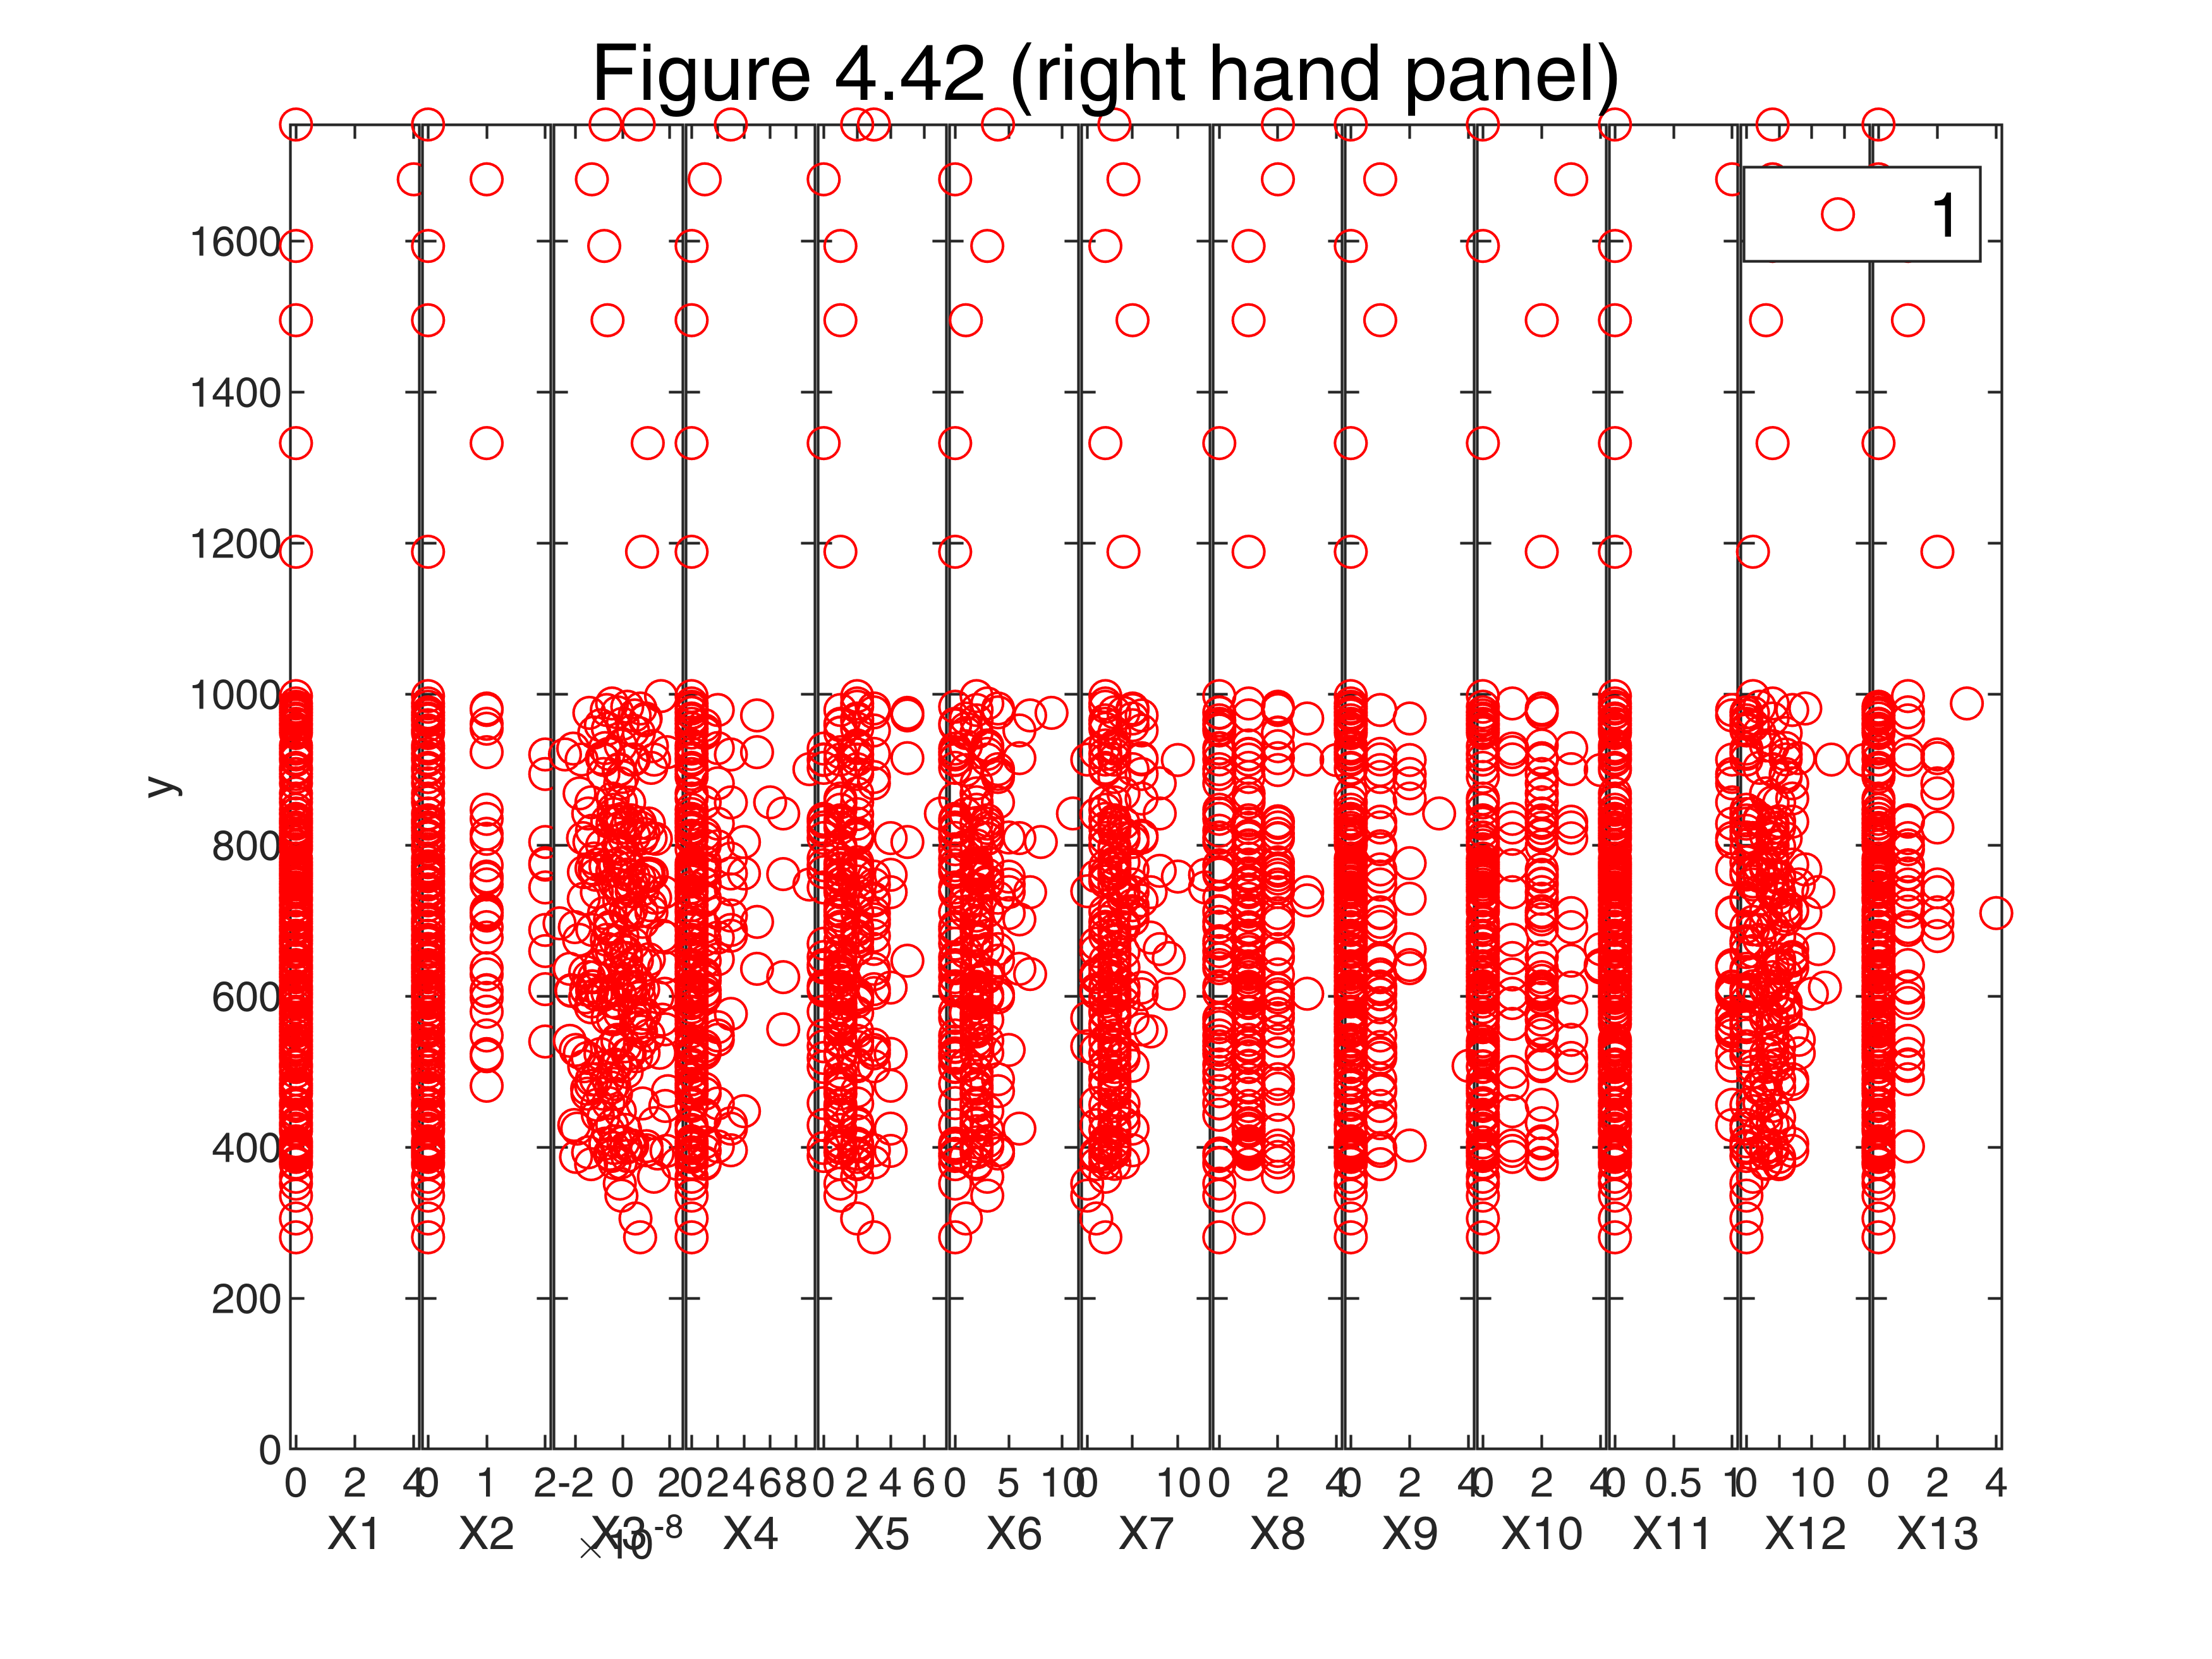

In [22]:
plo.sym='o';
plo.clr='r';
Xout=X(outliers,:);
yout=y(outliers);
% Some jittering for the third column because it is constant and yXplot
% thinks it is an intercept which does not have to be shown
Xout(:,3)=Xout(:,3)+1e-08*randn(length(outliers),1);
yXplot(yout,Xout,'plo',plo,'tag','yXout');
sgtitle('Figure 4.42 (right hand panel)')
set(gcf,"Name",'Figure 4.42 (right hand panel)')

In [23]:

%InsideREADME